# **Lung Disease Recovery Predictor**

In this notebook, we aim to achieve the following:

- Clean the data, if necessary
- Train 3 binary classification models (Naive Bayes, SVMs, & Random Forests)
- Evaluate the models using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix

## Exploratory Data Analysis

We are going to explore the data if there is any inconsistencies, missing values, or imbalanced classes, and deal with them.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./lung_disease_data.csv')
df.head()

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes            NaN   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD            NaN   
3  40.0  Female            Yes            NaN   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   

   Hospital Visits Recovered  
0             14.0       Yes  
1              7.0        No  
2              4.0       Yes  
3              1.0        No  
4              NaN       Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [5]:
df.describe()

Age  Lung Capacity  Hospital Visits
count  4900.000000    4900.000000      4900.000000
mean     54.449796       3.501865         7.528571
std      20.126882       1.461179         3.996401
min      20.000000       1.000000         1.000000
25%      37.000000       2.220000         4.000000
50%      54.000000       3.480000         8.000000
75%      72.000000       4.800000        11.000000
max      89.000000       6.000000        14.000000

In [6]:
# see columns
df.columns

Index(['Age', 'Gender', 'Smoking Status', 'Lung Capacity', 'Disease Type',
       'Treatment Type', 'Hospital Visits', 'Recovered'],
      dtype='object')

<Axes: >

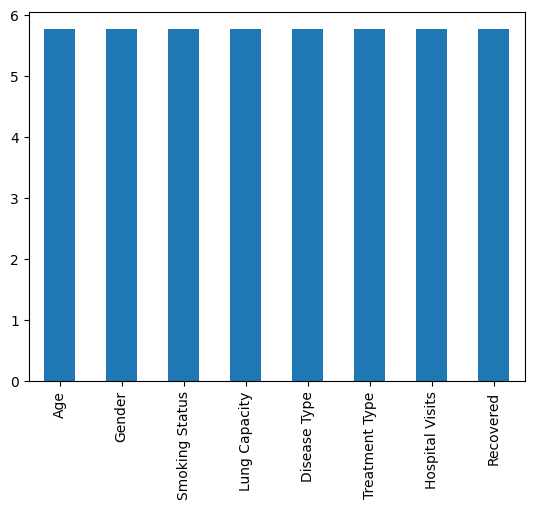

In [7]:
(df.isna().sum() / len(df) * 100).plot(kind="bar") # check NaN data by percent

All of the features have a consistent 300 missing values. We will impute them.

In [8]:
df[df.isna().any(axis=1)] # Show rows with NaN values

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
1     34.0  Female            Yes            NaN   Bronchitis        Surgery   
2     80.0    Male            Yes           1.95         COPD            NaN   
3     40.0  Female            Yes            NaN   Bronchitis     Medication   
4     43.0    Male            Yes           4.60         COPD        Surgery   
7     72.0    Male            NaN           2.61  Lung Cancer        Surgery   
...    ...     ...            ...            ...          ...            ...   
5181   NaN    Male            Yes           5.12  Lung Cancer            NaN   
5182   NaN  Female             No           4.11         COPD        Therapy   
5188  80.0    Male             No           2.49          NaN     Medication   
5191  29.0  Female             No           3.36       Asthma            NaN   
5196  21.0     NaN            Yes           1.50         COPD     Medication   

      Hospital Visits Recovered  
1                 7.0        No  
2                 4.0       Yes  
3                 1.0        No  
4                 NaN       Yes  
7                11.0       Yes  
...               ...       ...  
5181              1.0       Yes  
5182              3.0       Yes  
5188             13.0       Yes  
5191              6.0       Yes  
5196              4.0        No  

[1964 rows x 8 columns]

This confirms that we have alot of `NaN` data. Rows may have missing data but its columns has data.

In [9]:
# Impute numerical features with their mean
numerical_columns = ['Age', 'Lung Capacity', 'Hospital Visits']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute categorical features with their mode (most frequent value)
categorical_columns = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if all NaNs are handled
df.isna().sum()

Age                0
Gender             0
Smoking Status     0
Lung Capacity      0
Disease Type       0
Treatment Type     0
Hospital Visits    0
Recovered          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              5200 non-null   float64
 1   Gender           5200 non-null   object 
 2   Smoking Status   5200 non-null   object 
 3   Lung Capacity    5200 non-null   float64
 4   Disease Type     5200 non-null   object 
 5   Treatment Type   5200 non-null   object 
 6   Hospital Visits  5200 non-null   float64
 7   Recovered        5200 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [11]:
df.head()

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No       4.490000         COPD        Therapy   
1  34.0  Female            Yes       3.501865   Bronchitis        Surgery   
2  80.0    Male            Yes       1.950000         COPD     Medication   
3  40.0  Female            Yes       3.501865   Bronchitis     Medication   
4  43.0    Male            Yes       4.600000         COPD        Surgery   

   Hospital Visits Recovered  
0        14.000000       Yes  
1         7.000000        No  
2         4.000000       Yes  
3         1.000000        No  
4         7.528571       Yes

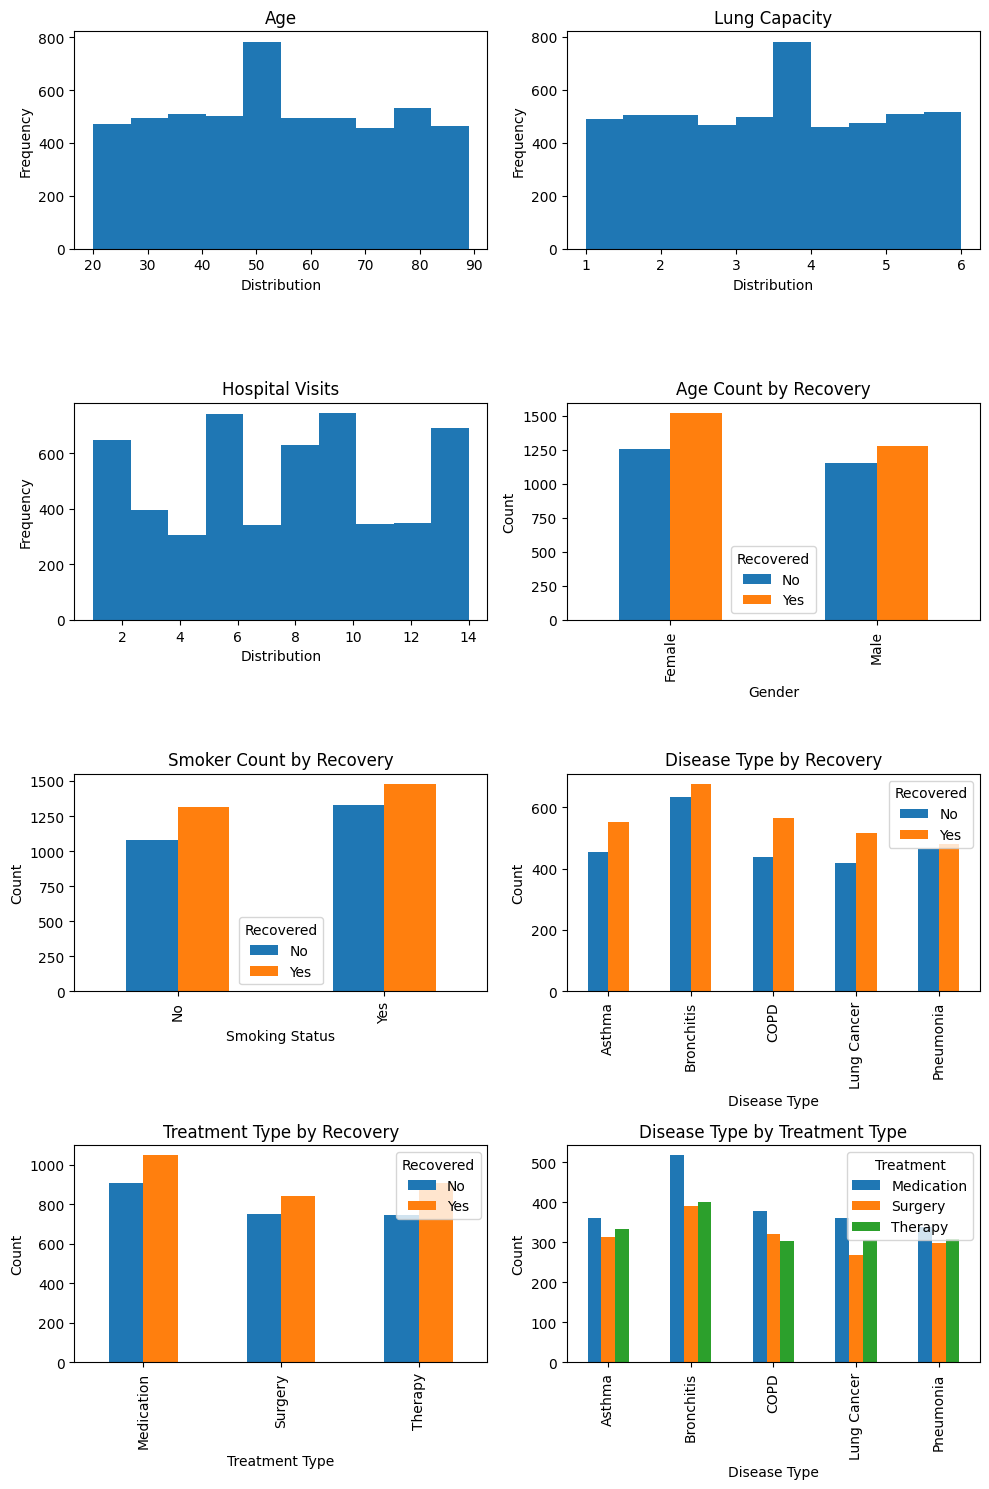

In [12]:
# see the distribution of the features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))

# Age
axes[0,0].hist(df['Age'])
axes[0,0].set_xlabel('Distribution')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Age')

# Lung Capacity
axes[0,1].hist(df['Lung Capacity'])
axes[0,1].set_xlabel('Distribution')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Lung Capacity')

# Lung Capacity
axes[1,0].hist(df['Hospital Visits'])
axes[1,0].set_xlabel('Distribution')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Hospital Visits')

# Gender vs rECOVERED
count_data = df.groupby(['Gender', 'Recovered']).size().unstack(fill_value=0)
count_data.plot(kind='bar', stacked=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Age Count by Recovery')
axes[1, 1].legend(title='Recovered')

# Smoking vs Recovered
count_data = df.groupby(['Smoking Status', 'Recovered']).size().unstack(fill_value=0)
count_data.plot(kind='bar', stacked=False, ax=axes[2, 0])
axes[2, 0].set_xlabel('Smoking Status')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Smoker Count by Recovery')
axes[2, 0].legend(title='Recovered')


# Disease Type vs Recovered
count_data = df.groupby(['Disease Type', 'Recovered']).size().unstack(fill_value=0)
count_data.plot(kind='bar', stacked=False, ax=axes[2, 1])
axes[2, 1].set_xlabel('Disease Type')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Disease Type by Recovery')
axes[2, 1].legend(title='Recovered')

# Treatment type vs Recovered
count_data = df.groupby(['Treatment Type', 'Recovered']).size().unstack(fill_value=0)
count_data.plot(kind='bar', stacked=False, ax=axes[3, 0])
axes[3, 0].set_xlabel('Treatment Type')
axes[3, 0].set_ylabel('Count')
axes[3, 0].set_title('Treatment Type by Recovery')
axes[3, 0].legend(title='Recovered')

# Disease type vs treatment type
count_data = df.groupby(['Disease Type', 'Treatment Type']).size().unstack(fill_value=0)
count_data.plot(kind='bar', stacked=False, ax=axes[3, 1])
axes[3, 1].set_xlabel('Disease Type')
axes[3, 1].set_ylabel('Count')
axes[3, 1].set_title('Disease Type by Treatment Type')
axes[3, 1].legend(title='Treatment')

plt.tight_layout()
plt.show()

There is no alarming inconsistencies or outliers.

Next we will convert the categorical variables to numerical for our model training.

## Data Cleaning

In [13]:
df.head()

Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No       4.490000         COPD        Therapy   
1  34.0  Female            Yes       3.501865   Bronchitis        Surgery   
2  80.0    Male            Yes       1.950000         COPD     Medication   
3  40.0  Female            Yes       3.501865   Bronchitis     Medication   
4  43.0    Male            Yes       4.600000         COPD        Surgery   

   Hospital Visits Recovered  
0        14.000000       Yes  
1         7.000000        No  
2         4.000000       Yes  
3         1.000000        No  
4         7.528571       Yes

In [14]:
from category_encoders import TargetEncoder

# label encoding for binary
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Recovered'] = df['Recovered'].map({'Yes': 1, 'No': 0})
df['Smoking Status'] = df['Smoking Status'].map({'Yes': 1, 'No': 0})
df['Age'] = df['Age'].astype(int)
df['Hospital Visits'] = df['Hospital Visits'].astype(int)

disease_type = pd.get_dummies(df['Disease Type'], prefix='Disease Type', dtype=int)
treatment_type = pd.get_dummies(df['Treatment Type'], prefix='Treatment Type', dtype=int)


""" 
# target encoding due to many classes
encoder = TargetEncoder(cols=['Disease Type'], smoothing=0.3)
df['DiseaseTypeEncoded'] = encoder.fit_transform(df['Disease Type'], df['Recovered'])

encoder = TargetEncoder(cols=['Treatment Type'], smoothing=0.3)
df['TreatmentTypeEncoded'] = encoder.fit_transform(df['Treatment Type'], df['Recovered']) """

" \n# target encoding due to many classes\nencoder = TargetEncoder(cols=['Disease Type'], smoothing=0.3)\ndf['DiseaseTypeEncoded'] = encoder.fit_transform(df['Disease Type'], df['Recovered'])\n\nencoder = TargetEncoder(cols=['Treatment Type'], smoothing=0.3)\ndf['TreatmentTypeEncoded'] = encoder.fit_transform(df['Treatment Type'], df['Recovered']) "

In [15]:
df = pd.concat([df, disease_type], axis=1)
df = pd.concat([df, treatment_type], axis=1)

In [16]:
df_oh = df.copy() # create copy for backup purposes
df_oh.head()

Age  Gender  Smoking Status  Lung Capacity Disease Type Treatment Type  \
0   71       0               0       4.490000         COPD        Therapy   
1   34       0               1       3.501865   Bronchitis        Surgery   
2   80       1               1       1.950000         COPD     Medication   
3   40       0               1       3.501865   Bronchitis     Medication   
4   43       1               1       4.600000         COPD        Surgery   

   Hospital Visits  Recovered  Disease Type_Asthma  Disease Type_Bronchitis  \
0               14          1                    0                        0   
1                7          0                    0                        1   
2                4          1                    0                        0   
3                1          0                    0                        1   
4                7          1                    0                        0   

   Disease Type_COPD  Disease Type_Lung Cancer  Disease Type_Pneumonia  \
0                  1                         0                       0   
1                  0                         0                       0   
2                  1                         0                       0   
3                  0                         0                       0   
4                  1                         0                       0   

   Treatment Type_Medication  Treatment Type_Surgery  Treatment Type_Therapy  
0                          0                       0                       1  
1                          0                       1                       0  
2                          1                       0                       0  
3                          1                       0                       0  
4                          0                       1                       0

In [17]:
# drop the categorical variables
df_oh = df_oh.drop(['Disease Type', 'Treatment Type'], axis=1)

In [18]:
# reordering columns for ease of normalization

df_oh = df_oh[['Age', 'Hospital Visits', 'Lung Capacity', 'Gender', 'Smoking Status',
            'Recovered', 'Disease Type_Asthma', 'Disease Type_Bronchitis',
            'Disease Type_COPD', 'Disease Type_Lung Cancer',
            'Disease Type_Pneumonia', 'Treatment Type_Medication',
            'Treatment Type_Surgery', 'Treatment Type_Therapy']]

In [19]:
df_oh.head()

Age  Hospital Visits  Lung Capacity  Gender  Smoking Status  Recovered  \
0   71               14       4.490000       0               0          1   
1   34                7       3.501865       0               1          0   
2   80                4       1.950000       1               1          1   
3   40                1       3.501865       0               1          0   
4   43                7       4.600000       1               1          1   

   Disease Type_Asthma  Disease Type_Bronchitis  Disease Type_COPD  \
0                    0                        0                  1   
1                    0                        1                  0   
2                    0                        0                  1   
3                    0                        1                  0   
4                    0                        0                  1   

   Disease Type_Lung Cancer  Disease Type_Pneumonia  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   Treatment Type_Medication  Treatment Type_Surgery  Treatment Type_Therapy  
0                          0                       0                       1  
1                          0                       1                       0  
2                          1                       0                       0  
3                          1                       0                       0  
4                          0                       1                       0

## Training

In [20]:
# split
X = df_oh.drop('Recovered', axis=1).values
y = df_oh['Recovered'].values

import numpy as np
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((5200, 13), (5200,))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
scaler = MinMaxScaler()
X_train[:, :3] = scaler.fit_transform(X_train[:, :3]) # scaling only the continous variables
X_test[:, :3] = scaler.transform(X_test[:, :3])

nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced')
svm = SVC(kernel='rbf')
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8)
lg = LogisticRegression(penalty='l2', solver='saga')

nb.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lg.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, model_name: str, X_test: np.array, y_test: np.array) -> None:
    """ 
    Evaluates given model in its accuracy, precision, recall, F1 score, and plots a confusion matrix.
    """
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f'{model_name} | Acc: {acc:.2f}% | Precision: {precision:.2f}% | F1 Score: {f1:.2f}% | Recall: {recall:.2f}%')
    
    results = dict({
        'Accuracy': acc,
        'Precision': precision,
        'F1 Score': f1,
        'Recall': recall
    })
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
    disp.plot(ax=axes[0])
    axes[0].set_title(f'Confusion Matrix of {model_name}')
    
    axes[1].bar(results.keys(), results.values())
    axes[1].set_ylim(0,1) # 0 to 1 limit
    axes[1].set_title(f'{model_name} Evaluation Metrics')
    
    plt.tight_layout()
    plt.show()

Naive Bayes | Acc: 0.53% | Precision: 0.57% | F1 Score: 0.62% | Recall: 0.67%


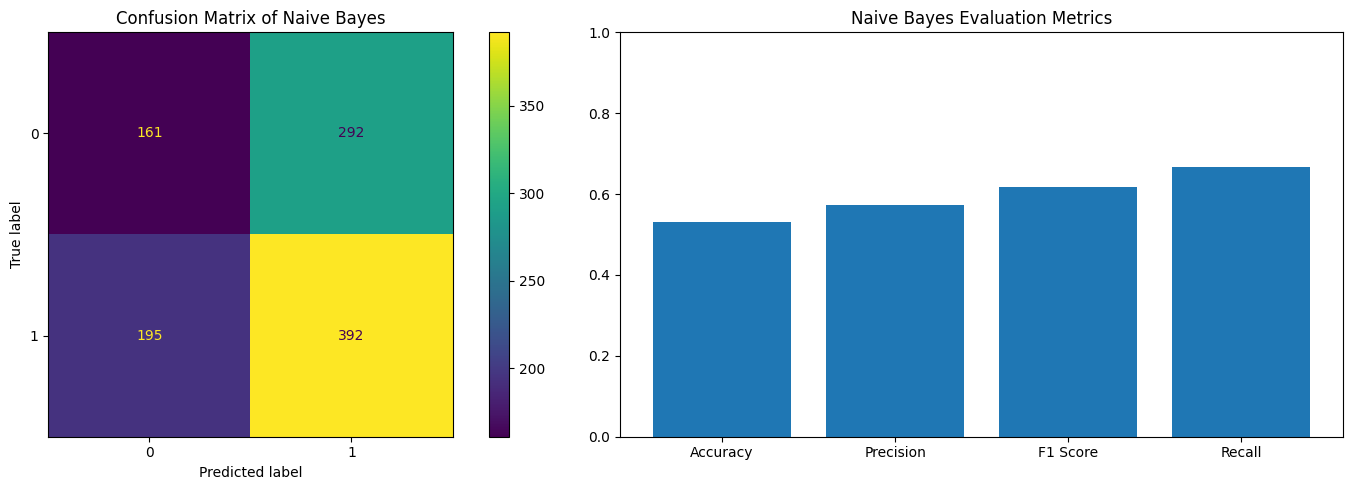

In [23]:
evaluate_model(nb, 'Naive Bayes', X_test, y_test)

SVM | Acc: 0.52% | Precision: 0.56% | F1 Score: 0.63% | Recall: 0.72%


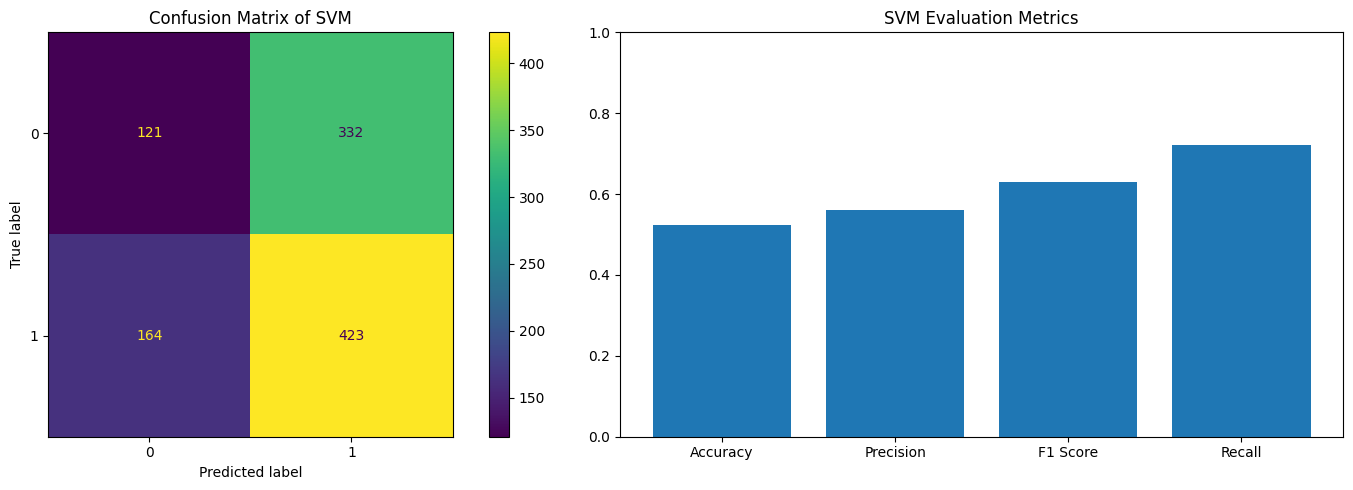

In [24]:
evaluate_model(svm, 'SVM', X_test, y_test)

XGBoost | Acc: 0.53% | Precision: 0.58% | F1 Score: 0.59% | Recall: 0.60%


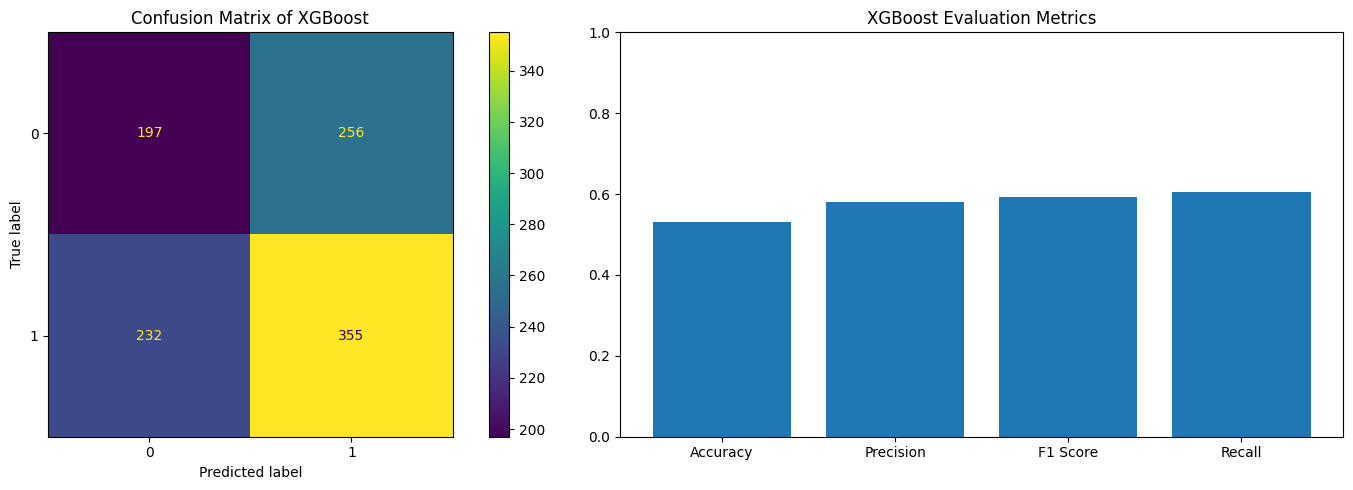

In [25]:
evaluate_model(xgb, 'XGBoost', X_test, y_test)

Random Forests | Acc: 0.54% | Precision: 0.59% | F1 Score: 0.59% | Recall: 0.60%


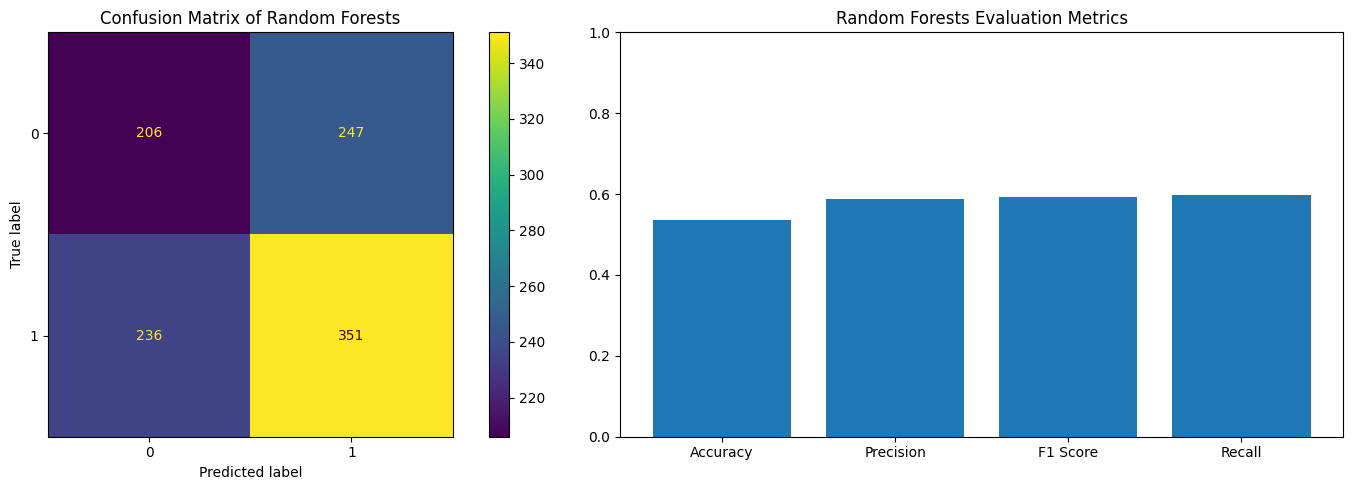

In [26]:
evaluate_model(rf, 'Random Forests', X_test, y_test)

LogisticRegression | Acc: 0.56% | Precision: 0.58% | F1 Score: 0.69% | Recall: 0.86%


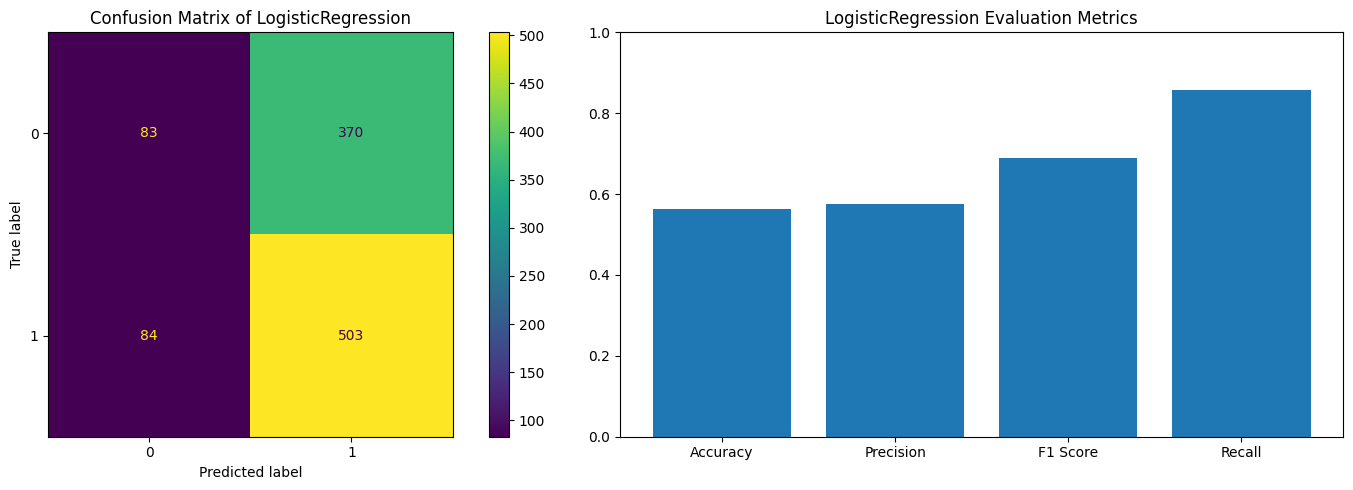

In [27]:
evaluate_model(lg, 'LogisticRegression', X_test, y_test)

In [28]:
df_oh.head()

Age  Hospital Visits  Lung Capacity  Gender  Smoking Status  Recovered  \
0   71               14       4.490000       0               0          1   
1   34                7       3.501865       0               1          0   
2   80                4       1.950000       1               1          1   
3   40                1       3.501865       0               1          0   
4   43                7       4.600000       1               1          1   

   Disease Type_Asthma  Disease Type_Bronchitis  Disease Type_COPD  \
0                    0                        0                  1   
1                    0                        1                  0   
2                    0                        0                  1   
3                    0                        1                  0   
4                    0                        0                  1   

   Disease Type_Lung Cancer  Disease Type_Pneumonia  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   Treatment Type_Medication  Treatment Type_Surgery  Treatment Type_Therapy  
0                          0                       0                       1  
1                          0                       1                       0  
2                          1                       0                       0  
3                          1                       0                       0  
4                          0                       1                       0

In [61]:
def prediction(model, age: int, gender: str,
               smoke_status: str, lung_capacity: float,
               disease_type: str, treatment_type: str,
               hospital_visits: int
               ) -> int:
    
    df_input = pd.DataFrame(
        {'Age': [age],
         'Hospital Visits': [hospital_visits],
         'Lung Capacity': [lung_capacity],
         'Gender': [1 if gender == "Male" else 0],
         'Smoking Status': [1 if smoke_status == "Yes" else 0],
         'Disease Type_Asthma': [1 if disease_type in 'Disease Type_Asthma' else 0],
         'Disease Type_Bronchitis': [1 if disease_type in 'Disease Type_Bronchitis' else 0],
        'Disease Type_COPD': [1 if disease_type in 'Disease Type_COPD' else 0],
        'Disease Type_Lung Cancer': [1 if disease_type in 'Disease Type_Lung Cancer' else 0],
        'Disease Type_Pneumonia': [1 if disease_type in 'Disease Type_Pneumonia' else 0],
        
        'Treatment Type_Medication': [1 if treatment_type in 'Treatment Type_Medication' else 0],
        'Treatment Type_Surgery': [1 if treatment_type in 'Treatment Type_Surgery' else 0],
        'Treatment Type_Therapy': [1 if treatment_type in 'Treatment Type_Therapy' else 0]
         }
    )
    
    input_arr = np.array(df_input)
    
    prediction = model.predict(input_arr)[0]
    
    return prediction.item()
    
    
prediction(lg, 20, 'Male', 'Yes', 7.14, 'COPD', 'Surgery', 5)

1

In [29]:
# Saving the models
from joblib import dump
from pathlib import Path
import os


model_dir = Path('./models/')

if not os.path.exists(model_dir):
    os.makedirs(model_dir, exist_ok=True)

dump(nb, model_dir/'GaussianNB.pkl')
dump(rf, model_dir/'RandomForests.pkl')
dump(xgb, model_dir/'XGBoost.pkl')
dump(svm, model_dir/'SVM.pkl')
dump(lg, model_dir/'LogisticRegression.pkl')
df_oh.to_csv('preprocessed_data.csv', index=False)
